In [17]:
!pip install tensorflow==1.14.0

  Using cached https://files.pythonhosted.org/packages/f4/28/96efba1a516cdacc2e2d6d081f699c001d414cc8ca3250e6d59ae657eb2b/tensorflow-1.14.0-cp37-cp37m-manylinux1_x86_64.whl
  Found existing installation: tensorflow 2.0.0b1
    Uninstalling tensorflow-2.0.0b1:
      Successfully uninstalled tensorflow-2.0.0b1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend
from tensorflow import keras
from tensorflow.python.keras import backend as k

Using TensorFlow backend.


In [2]:
df_train = pd.read_csv('sign-language-mnist/sign_mnist_train.csv')
df_test = pd.read_csv('sign-language-mnist/sign_mnist_test.csv')

In [3]:
labels = df_train['label'].values

In [4]:
df_train.drop('label', axis=1, inplace=True)

In [5]:
images = df_train.values

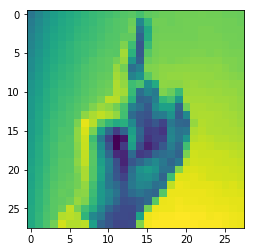

In [6]:
plt.imshow(images[0].reshape(28, 28))

In [7]:
images = df_train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [8]:
label_bin = LabelBinarizer()
labels = label_bin.fit_transform(labels)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, random_state = 101)

Text(0.5, 1.0, '28x28 data')

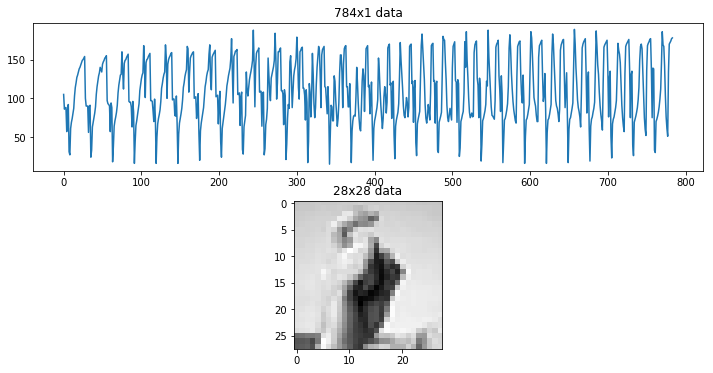

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[20].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')


In [13]:
x_train.shape, x_test.shape

((24709, 784), (2746, 784))

In [14]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [15]:
x_train = x_train.astype("float32")/255.
x_test = x_test.astype("float32")/255.

In [16]:
x_train.shape, x_test.shape

((24709, 28, 28, 1), (2746, 28, 28, 1))

In [18]:
y_train.shape, y_test.shape

((24709, 24), (2746, 24))

In [19]:
y_test.shape

(2746, 24)

In [20]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='softmax'))

W0725 23:54:19.743948 139929644852992 deprecation_wrapper.py:119] From /home/matthew/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 23:54:19.980907 139929644852992 deprecation_wrapper.py:119] From /home/matthew/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 23:54:20.013314 139929644852992 deprecation_wrapper.py:119] From /home/matthew/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 23:54:20.119827 139929644852992 deprecation_wrapper.py:119] From /home/matthew/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_defaul

In [21]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [22]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

W0725 23:54:30.656781 139929644852992 deprecation_wrapper.py:119] From /home/matthew/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [23]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        4640      
__________

In [26]:
y_train[0].shape

(24,)

In [27]:
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=16),
                           steps_per_epoch=500,
                           epochs=50, 
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_test, y_test), 
                           callbacks=[annealer])

W0725 23:54:57.259371 139929644852992 deprecation.py:323] From /home/matthew/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
 - 15s - loss: 1.9360 - acc: 0.4050 - val_loss: 0.6441 - val_acc: 0.7702
Epoch 2/50
 - 13s - loss: 0.8833 - acc: 0.7036 - val_loss: 0.3142 - val_acc: 0.8762
Epoch 3/50
 - 13s - loss: 0.5804 - acc: 0.8010 - val_loss: 0.1335 - val_acc: 0.9490
Epoch 4/50
 - 13s - loss: 0.4111 - acc: 0.8626 - val_loss: 0.0542 - val_acc: 0.9851
Epoch 5/50
 - 14s - loss: 0.3389 - acc: 0.8816 - val_loss: 0.0315 - val_acc: 0.9902
Epoch 6/50
 - 14s - loss: 0.2842 - acc: 0.9049 - val_loss: 0.0837 - val_acc: 0.9727
Epoch 7/50
 - 13s - loss: 0.2291 - acc: 0.9242 - val_loss: 0.0059 - val_acc: 0.9989
Epoch 8/50
 - 15s - loss: 0.2069 - acc: 0.9326 - val_loss: 0.0064 - val_acc: 0.9989
Epoch 9/50
 - 16s - loss: 0.1864 - acc: 0.9394 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 10/50
 - 13s - loss: 0.1537 - acc: 0.9502 - val_loss: 0.0025 - val_acc: 0.9996
Epoch 11/50
 - 13s - loss: 0.1508 - acc: 0.9525 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 12/50
 - 13s - loss: 0.1258 - acc: 0.9596 - val_loss: 6.1114e-04 - v

In [28]:
final_loss, final_acc = model.evaluate(x_test, y_test, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0000, final accuracy: 1.0000
